In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Simple Cave 01

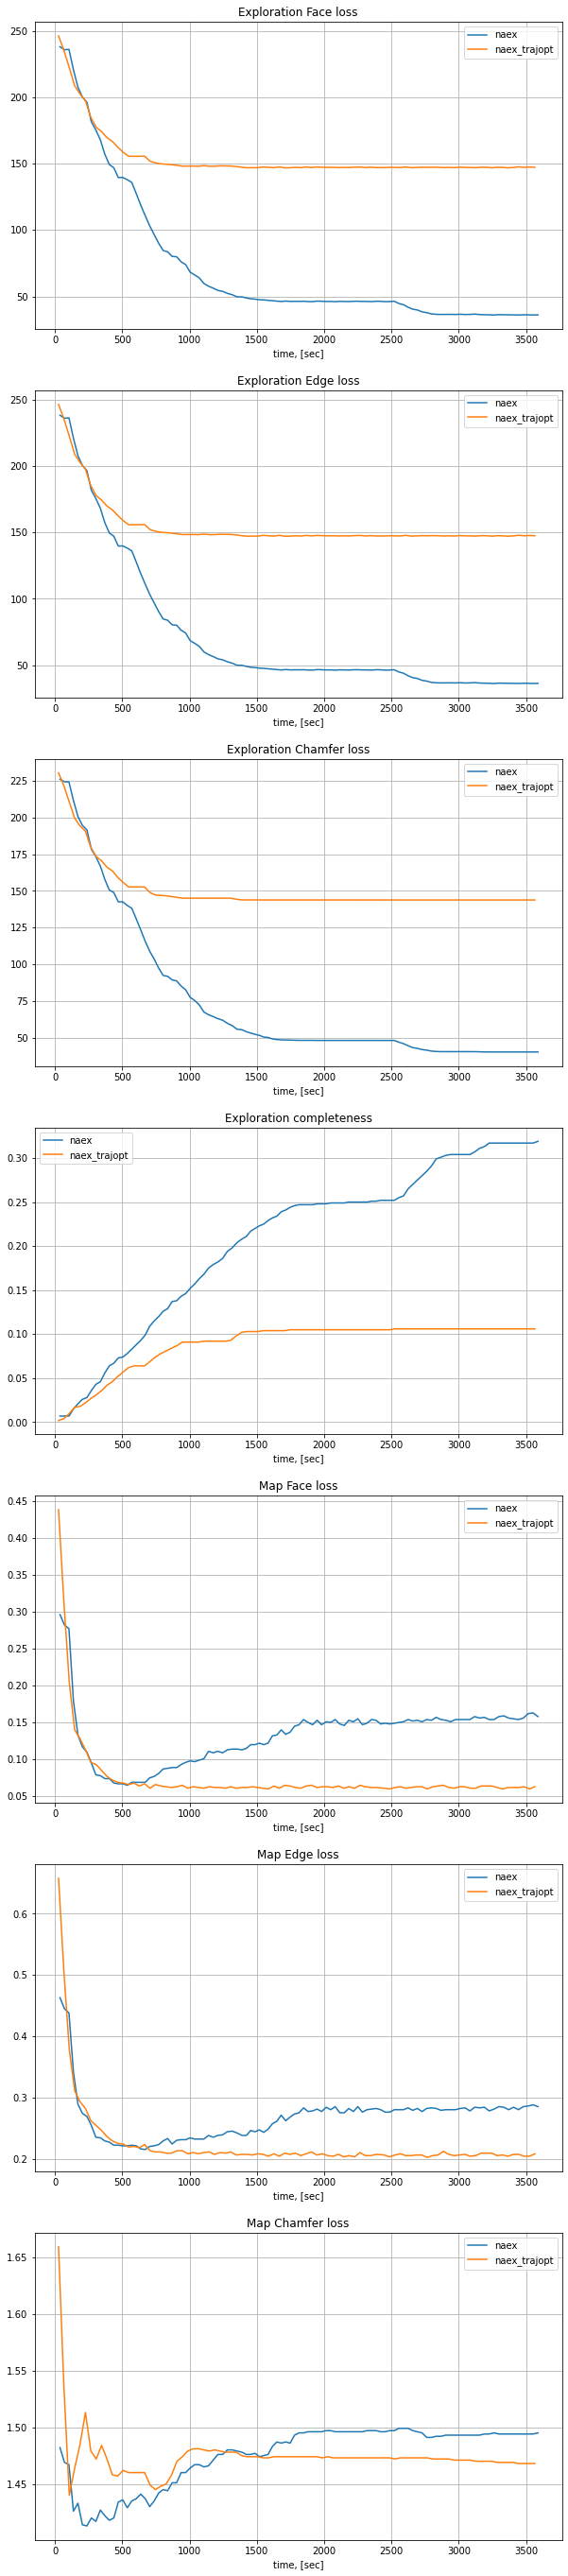

In [11]:
PATH = '../data/results/simple_cave_01/'
# data = pd.read_excel(os.path.join(PATH, 'simple_cave_01_1001.013674807.xls'))
data = pd.read_excel(os.path.join(PATH, 'simple_cave_01_25405.682570885.xls'))
data_trajopt = pd.read_excel(os.path.join(PATH, 'simple_cave_01_2398.948488391.xls'))

metrics = [key for key in data_trajopt if not 'Time stamp' in key]

plt.figure(figsize=(10, 7*len(metrics)))
for i, metric in enumerate(metrics):
    plt.subplot(len(metrics), 1, i+1)
    plt.title(metric)
    plt.plot(data['Time stamp'], data[metric], label='naex')
    plt.plot(data_trajopt['Time stamp'], data_trajopt[metric], label='naex_trajopt')
    plt.grid()
    plt.xlabel('time, [sec]')
    plt.legend();

## Simple Cave 02

In [3]:
PATH = '../data/results/simple_cave_02/'
xls_files = [file for file in os.listdir(PATH) if 'xls' in file]

In [4]:
data = pd.read_excel(os.path.join(PATH, 'simple_cave_02.xls'))
data_trajopt = pd.read_excel(os.path.join(PATH, 'simple_cave_02_trajopt.xls'))

In [5]:
data.head()

,Time stamp,Exploration Face loss,Exploration Edge loss,Exploration Chamfer loss,Exploration completeness,Map Face loss,Map Edge loss,Map Chamfer loss
0,73.075851,128.843,128.937,110.606,0.004,0.394,0.609,1.553
1,113.074103,117.941,118.039,102.059,0.011,0.215,0.401,1.522
2,153.057129,116.848,116.945,101.076,0.016,0.159,0.334,1.504
3,193.089165,116.770,116.867,101.072,0.017,0.152,0.321,1.486
4,233.067870,114.852,114.946,99.394,0.018,0.139,0.312,1.502


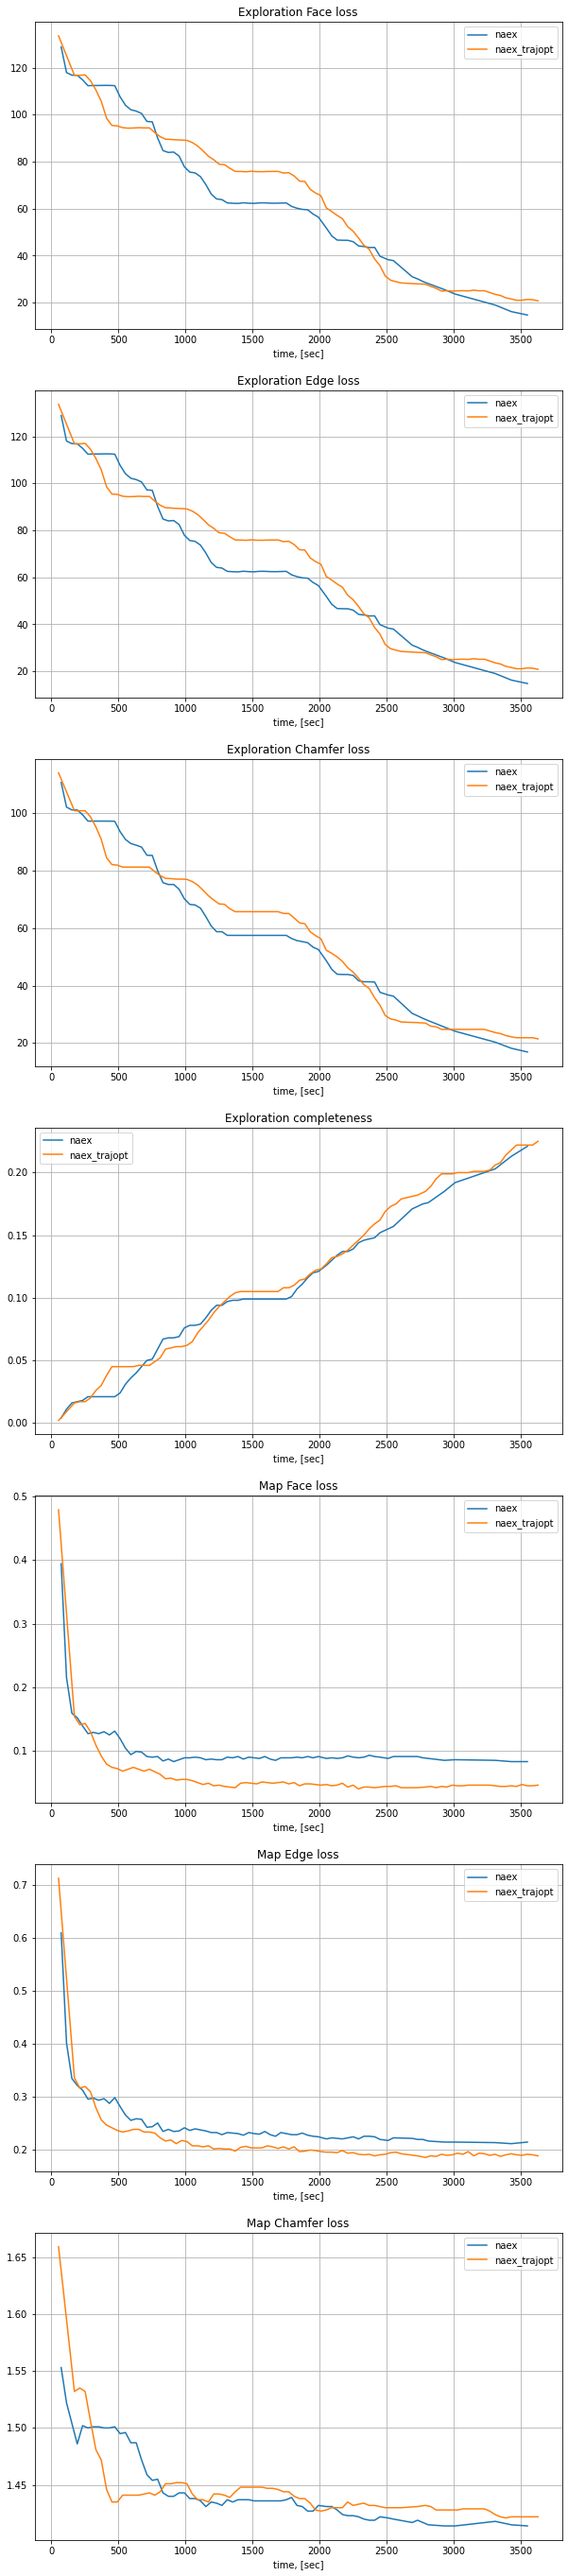

In [6]:
metrics = [key for key in data if not 'Time stamp' in key]

plt.figure(figsize=(10, 7*len(metrics)))
for i, metric in enumerate(metrics):
    plt.subplot(len(metrics), 1, i+1)
    plt.title(metric)
    plt.plot(data['Time stamp'], data[metric], label='naex')
    plt.plot(data_trajopt['Time stamp'], data_trajopt[metric], label='naex_trajopt')
    plt.grid()
    plt.xlabel('time, [sec]')
    plt.legend();

## Simple Cave 03

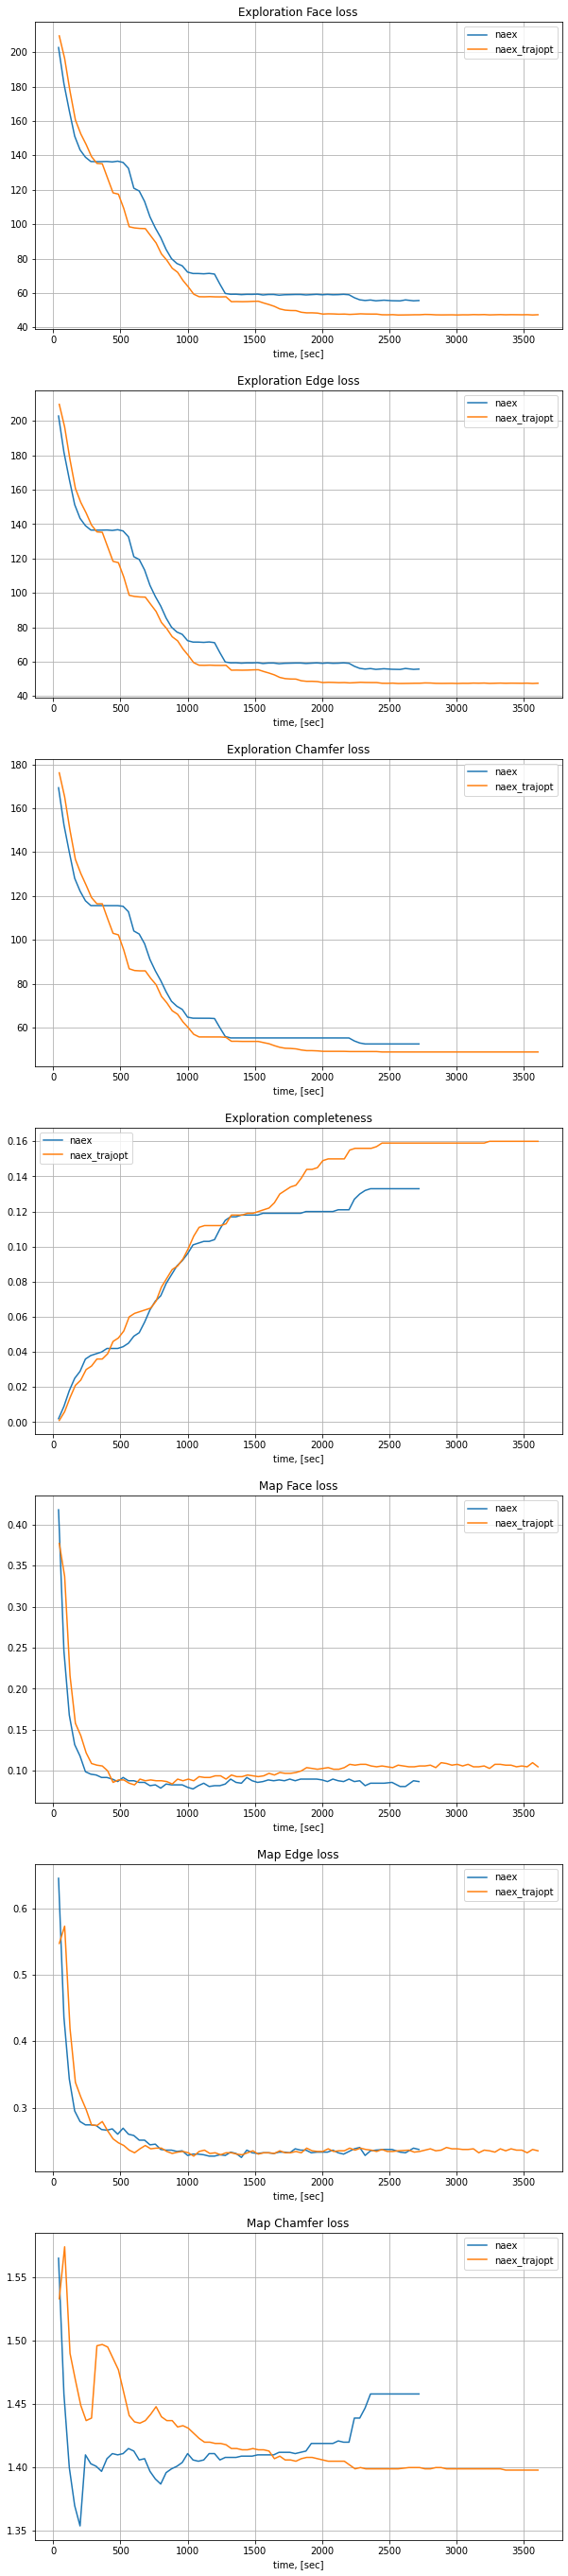

In [7]:
PATH = '../data/results/simple_cave_03/'
data = pd.read_excel(os.path.join(PATH, 'simple_cave_03_22912.34489025.xls'))
data_trajopt = pd.read_excel(os.path.join(PATH, 'simple_cave_03_17549.504314947.xls'))

metrics = [key for key in data if not 'Time stamp' in key]

plt.figure(figsize=(10, 7*len(metrics)))
for i, metric in enumerate(metrics):
    plt.subplot(len(metrics), 1, i+1)
    plt.title(metric)
    plt.plot(data['Time stamp'], data[metric], label='naex')
    plt.plot(data_trajopt['Time stamp'], data_trajopt[metric], label='naex_trajopt')
    plt.grid()
    plt.xlabel('time, [sec]')
    plt.legend();